## Question 1: **Answer**

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
def add_data_to_database(sales_data, products_data, customers_data):
    try:
        df = pd.read_csv(sales_data)
        df1 = pd.read_csv(products_data, encoding='unicode_escape')
        df2 = pd.read_csv(customers_data, encoding='unicode_escape')
        # Connecting to database
        engine = sqlite3.connect("superstore_data.db")
        df.to_sql("sales", con=engine, index = False)
        df1.to_sql("products", con=engine, index = False)
        df2.to_sql("customers", con=engine, index = False)
        engine.close()
    except Exception as e:
            print(f'Error: {e}')

# Loading CSV files
sales = "/content/Superstore_Sales.csv"
products =  "/content/Superstore_Product.csv"
customers = "/content/Superstore_Customer.csv"

add_data_to_database(sales, products, customers)

In [3]:
# Loading SQL extension
%load_ext sql

In [4]:
# Default to duplicated style
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [5]:
# Connecting to the database
%sql sqlite:///superstore_data.db

In [6]:
%%sql
SELECT * FROM sales
LIMIT 5;

 * sqlite:///superstore_data.db
Done.


Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
1,CA-2016-152156,11 08 2016,11 11 2016,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,261.96,2,0.0,41.9136
2,CA-2016-152156,11 08 2016,11 11 2016,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,731.94,3,0.0,219.582
3,CA-2016-138688,6 12 2016,6/16/2016,Second Class,DV-13045,United States,Los Angeles,California,90036,West,OFF-LA-10000240,14.62,2,0.0,6.8714
4,US-2015-108966,10 11 2015,10/18/2015,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,957.5775,5,0.45,-383.031
5,US-2015-108966,10 11 2015,10/18/2015,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,22.368,2,0.2,2.5164


In [7]:
%%sql
SELECT * FROM products
LIMIT 5;

 * sqlite:///superstore_data.db
Done.


Product ID,Category,Sub-Category,Product Name
FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Planked Cherry Finish"
FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"


In [8]:
%%sql
SELECT * FROM customers
LIMIT 5;

 * sqlite:///superstore_data.db
Done.


Customer ID,Customer Name,Segment
AA-10315,Alex Avila,Consumer
AA-10375,Allen Armold,Consumer
AA-10480,Andrew Allen,Consumer
AA-10645,Anna Andreadi,Consumer
AB-10015,Aaron Bergman,Consumer


##### How many products are in each category of the store?

In [9]:
%%sql
SELECT
    Category, COUNT(*) AS category_count
FROM products
GROUP BY Category;

 * sqlite:///superstore_data.db
Done.


Category,category_count
Furniture,375
Office Supplies,1083
Technology,404


## Question 2: **Answer**

In [10]:
%%sql
UPDATE sales
SET [Order Date] = DATE(REPLACE(CASE
                    -- Convert 'MM DD YYYY' to 'YYYY-MM-DD'
                        WHEN [Order Date] LIKE '__ __ ____'
                            THEN SUBSTR([Order Date], 7, 4) || '-' || -- Year
                            SUBSTR([Order Date], 1, 2) || '-' || -- Month
                            SUBSTR([Order Date], 4, 2) -- Day

                    -- Convert 'M DD YYYY' to 'YYYY-MM-DD'
                        WHEN [Order Date] LIKE '_ __ ____'
                            THEN SUBSTR([Order Date], 6, 4) || '-0' || -- Year
                            SUBSTR([Order Date], 1, 1) || '-' || -- Month
                            SUBSTR([Order Date], 3, 2) -- Day

                    -- Convert 'MM/DD/YYYY' to 'YYYY-MM-DD'
                        WHEN [Order Date] LIKE '__/__/____'
                            THEN SUBSTR([Order Date], 7, 4) || '-' || -- Year
                            SUBSTR([Order Date], 1, 2) || '-' || -- Month
                            SUBSTR([Order Date], 4, 2)-- Day

                    -- Convert 'M/DD/YYYY' to 'YYYY-MM-DD'
                        WHEN [Order Date] LIKE '_/__/____'
                            THEN SUBSTR([Order Date], 6, 4) || '-0' || -- Year
                            SUBSTR([Order Date], 1, 1) || '-' || -- Month
                            SUBSTR([Order Date], 3, 2) -- Day
                            ELSE ([Order Date])
                    END, ' -0', '-0'));  -- Leave unchanged

 * sqlite:///superstore_data.db
9994 rows affected.


[]

In [11]:
%%sql
UPDATE sales
SET [Ship Date] =  DATE(REPLACE(CASE
                    -- Convert 'MM DD YYYY' to 'YYYY-MM-DD'
                        WHEN [Ship Date] LIKE '__ __ ____'
                            THEN SUBSTR([Ship Date], 7, 4) || '-' || -- Year
                            SUBSTR([Ship Date], 1, 2) || '-' || -- Month
                            SUBSTR([Ship Date], 4, 2) -- Day

                    -- Convert 'M DD YYYY' to 'YYYY-MM-DD'
                        WHEN [Ship Date] LIKE '_ __ ____'
                            THEN SUBSTR([Ship Date], 6, 4) || '-0' || -- Year
                            SUBSTR([Ship Date], 1, 1) || '-' || -- Month
                            SUBSTR([Ship Date], 3, 2) -- Day

                    -- Convert 'MM/DD/YYYY' to 'YYYY-MM-DD'
                        WHEN [Ship Date] LIKE '__/__/____'
                            THEN SUBSTR([Ship Date], 7, 4) || '-' || -- Year
                            SUBSTR([Ship Date], 1, 2) || '-' || -- Month
                            SUBSTR([Ship Date], 4, 2) -- Day

                    -- Convert 'M/DD/YYYY' to 'YYYY-MM-DD'
                        WHEN [Ship Date] LIKE '_/__/____'
                            THEN SUBSTR([Ship Date], 6, 4) || '-0' || -- Year
                            SUBSTR([Ship Date], 1, 1) || '-' || -- Month
                            SUBSTR([Ship Date], 3, 2) -- Day
                            ELSE ([Ship Date])
                    END, ' -0', '-0'));  -- Leave unchanged

 * sqlite:///superstore_data.db
9994 rows affected.


[]

In [12]:
%%sql
SELECT
-- Checking for None values in Order Date Column
    SUM(CASE
            WHEN [Order Date] IS NULL THEN 1 ELSE 0
        END) AS none_values_in_orderdate,
-- Checking for None values in Ship date Column
    SUM(CASE
            WHEN [Ship Date] IS NULL THEN 1 ELSE 0
        END) AS none_values_in_shipdate
FROM sales;

 * sqlite:///superstore_data.db
Done.


none_values_in_orderdate,none_values_in_shipdate
0,0


## Question 3: **Answer**

In [13]:
%%sql
SELECT
    [Product Name]
FROM products
WHERE LENGTH([Product Name]) != LENGTH(TRIM([Product Name]));

 * sqlite:///superstore_data.db
Done.


Product Name
Iceberg Mobile Mega Data/Printer Cart
Anker Ultrathin Bluetooth Wireless Keyboard Aluminum Cover with Stand
Kensington SlimBlade Notebook Wireless Mouse with Nano Receiver


In [14]:
%%sql
UPDATE products
SET [Product Name] = TRIM([Product Name])
WHERE LENGTH([Product Name]) != LENGTH(TRIM([Product Name]));

 * sqlite:///superstore_data.db
3 rows affected.


[]

In [15]:
%%sql
SELECT
    CASE
        WHEN EXISTS (
            SELECT 1
            FROM products
            WHERE [Product Name] LIKE ' %' OR [Product Name] LIKE '% '
        ) THEN 'Rows with leading or trailing spaces found'
        ELSE 'No leading or trailing spaces'
    END AS whitespace_check;

 * sqlite:///superstore_data.db
Done.


whitespace_check
No leading or trailing spaces


## Question 4: **Answer**

In [16]:
%%sql
SELECT
    s.[Customer ID],
    c.[Customer Name],
    p.[Product Name],
    s.Sales
FROM sales s
-- Join with the customers table
INNER JOIN customers c
ON s.[Customer ID] = c.[Customer ID]
-- Join with the products table
INNER JOIN products p
ON s.[Product ID] = p.[Product ID]
WHERE s.[Customer ID] = 'TB-21520'
    AND p.[Product Name] = 'Lumber Crayons';

 * sqlite:///superstore_data.db
Done.


Customer ID,Customer Name,Product Name,Sales
TB-21520,Tracy Blumstein,Lumber Crayons,15.76


## Question 5: **Answer**

In [17]:
%%sql
-- Getting 2015 and 2016 sales for Furniture
WITH yearly_sales AS (
    SELECT
        STRFTIME('%Y', [Order Date]) AS sales_year,
        SUM(sales.Sales) AS total_sales
    FROM sales
    JOIN products ON sales.[Product ID] = products.[Product ID]
    WHERE products.Category = 'Furniture'
        AND STRFTIME('%Y', [Order Date]) IN ('2015', '2016')
    GROUP BY sales_year
)
SELECT
    ROUND(MAX(CASE WHEN sales_year = '2015' THEN total_sales END), 2)
    AS sales_value_2015,
    ROUND(MAX(CASE WHEN sales_year = '2016' THEN total_sales END), 2)
    AS sales_value_2016,

    -- Calculating the percentage change
    ROUND(
        ((MAX(CASE WHEN sales_year = '2016' THEN total_sales END) -
          MAX(CASE WHEN sales_year = '2015' THEN total_sales END))
        / MAX(CASE WHEN sales_year = '2015' THEN total_sales END)) * 100, 2
    ) AS percentage_change
FROM yearly_sales;

 * sqlite:///superstore_data.db
Done.


sales_value_2015,sales_value_2016,percentage_change
170518.24,198901.44,16.65


In [18]:
query = """

-- Getting 2015 and 2016 sales for Furniture
WITH yearly_sales AS (
    SELECT
        strftime('%Y', [Order Date]) AS sales_year,
        SUM(sales.Sales) AS total_sales
    FROM sales
    JOIN products ON sales.[Product ID] = products.[Product ID]
    WHERE products.Category = 'Furniture'
        AND strftime('%Y', [Order Date]) IN ('2015', '2016')
    GROUP BY sales_year
)
SELECT
    ROUND(MAX(CASE WHEN sales_year = '2015' THEN total_sales END), 2)
    AS sales_value_2015,
    ROUND(MAX(CASE WHEN sales_year = '2016' THEN total_sales END), 2)
    AS sales_value_2016,

    -- Calculating the percentage change
    ROUND(
        ((MAX(CASE WHEN sales_year = '2016' THEN total_sales END) -
          MAX(CASE WHEN sales_year = '2015' THEN total_sales END))
        / MAX(CASE WHEN sales_year = '2015' THEN total_sales END)) * 100, 2
    ) AS percentage_change
FROM yearly_sales;

"""

In [19]:
# Connecting to the DataFrame
connection = sqlite3.connect('superstore_data.db')
# Creating a Dataframe
df = pd.read_sql_query(query, connection)
print(df)

   sales_value_2015  sales_value_2016  percentage_change
0         170518.24         198901.44              16.65


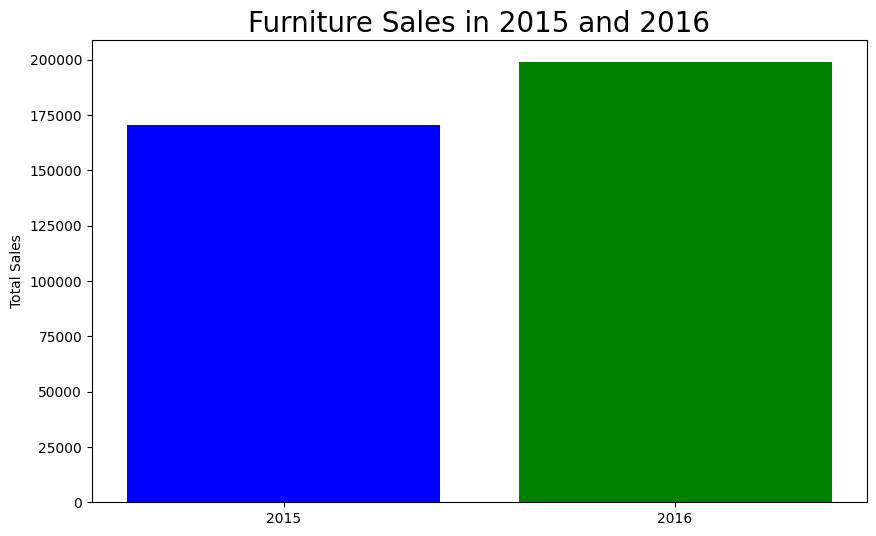

Increase in Sales: 16.65%


In [20]:
# Plotting the bar graph and set the plot size
fig, ax = plt.subplots(figsize = (10, 6))

# Creating the bar plot for sales in 2015 and 2016
ax.bar(['2015'], df['sales_value_2015'], label='2015',
       color = 'blue')
ax.bar(['2016'], df['sales_value_2016'], label='2016',
       color = 'green')
# Setting the labels and title
ax.set_ylabel('Total Sales')
ax.set_title('Furniture Sales in 2015 and 2016',fontsize=20)
plt.show()
print(f"Increase in Sales: {df['percentage_change'][0]:.2f}%")
connection.close()

## Question 6: **Answer**

In [21]:
%%sql
-- Calculating profit per product
WITH profit_per_product AS (
    SELECT
        s.[Product ID],
        p.[Product Name],
        p.Category,
        SUM(s.Profit) AS total_profit_2016
    FROM sales s
    JOIN products p
    ON s.[Product ID] = p.[Product ID]
    WHERE p.Category = 'Technology'
        AND STRFTIME('%Y', s.[Order Date]) = '2016'
    GROUP BY s.[Product ID], p.[Product Name], p.Category
),
-- Getting the minimum profit value
min_profit AS (
    SELECT MIN(total_profit_2016) AS min_profit_2016
    FROM profit_per_product
)
-- Joining the CTE with the min_profit CTE
SELECT ppp.*
FROM profit_per_product ppp
JOIN min_profit mp
ON ppp.total_profit_2016 = mp.min_profit_2016;

 * sqlite:///superstore_data.db
Done.


Product ID,Product Name,Category,total_profit_2016
TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,Technology,-6599.978


## Question 7: **Answer**

In [22]:
%%sql
-- Ranking customers based on profit
WITH top_customers AS (
    SELECT
        s.[Customer ID] AS customer_id,
        c.[Customer Name] AS customer_name,
        COUNT(s.[Order ID]) AS number_of_orders,
        ROUND(SUM(s.Sales), 2) AS total_sales,
        ROUND(SUM(s.Profit), 2) AS total_profit,
        ROUND((SUM(s.Profit) / SUM(s.Sales)),2) AS profit_margin,
        DENSE_RANK() OVER (ORDER BY SUM(s.Profit) DESC) AS rank
    FROM sales s
    INNER JOIN customers c
    ON s.[Customer ID] = c.[Customer ID]
    GROUP BY s.[Customer ID], c.[Customer Name]
    HAVING
        COUNT(s.[Order ID]) >= 5 AND
        SUM(s.Sales) > 5000 AND
        (SUM(s.Profit) / SUM(s.Sales)) >= 0.40
)
SELECT
    customer_id,
    customer_name,
    number_of_orders,
    total_sales,
    total_profit,
    profit_margin
FROM top_customers
WHERE rank <= 3
ORDER BY profit_margin DESC;

 * sqlite:///superstore_data.db
Done.


customer_id,customer_name,number_of_orders,total_sales,total_profit,profit_margin
TC-20980,Tamara Chand,12,19052.22,8981.32,0.47
RB-19360,Raymond Buch,18,15117.34,6976.1,0.46
SC-20095,Sanjit Chand,22,14142.33,5757.41,0.41


## Question 8: **Answer**

In [23]:
%%sql
SELECT
    -- Percentage impact on discounted sales
    ROUND(
        100 * (
            SUM(CASE WHEN Discount > 0 THEN Sales / (1 - Discount) ELSE 0 END) -
            SUM(CASE WHEN Discount > 0 THEN Sales ELSE 0 END)
        ) / SUM(CASE WHEN Discount > 0 THEN Sales / (1 - Discount) ELSE 0 END),
        2
    ) AS percentage_impact_discounted_sales,

    -- Percentage impact on overall sales
    ROUND(
        100 * (
            SUM(Sales / NULLIF(1 - Discount, 0)) - SUM(Sales)
        ) / SUM(Sales / NULLIF(1 - Discount, 0)),
        2
    ) AS percentage_impact_overall_sales
FROM sales;

 * sqlite:///superstore_data.db
Done.


percentage_impact_discounted_sales,percentage_impact_overall_sales
31.91,19.79


## Question 9: **Answer**

In [24]:
%%sql
-- CTE to calculate total sales for each state in 2016 and 2017
WITH yearly_sales AS (
    SELECT
        State,
        ROUND(SUM(CASE WHEN STRFTIME('%Y', [Order Date]) = '2016' THEN sales ELSE 0 END), 2)
        AS total_sales_2016,
        ROUND(SUM(CASE WHEN STRFTIME('%Y', [Order Date]) = '2017' THEN sales ELSE 0 END), 2)
        AS total_sales_2017
    FROM sales
    WHERE STRFTIME('%Y', [Order Date]) IN ('2016', '2017')
    GROUP BY State
),
-- CTE to rank states based on sales difference
ranking_sales AS (
    SELECT
        State,
        total_sales_2016,
        total_sales_2017,
        ROUND((total_sales_2017 - total_sales_2016), 2)
        AS sales_difference,
        DENSE_RANK() OVER (ORDER BY (total_sales_2017 - total_sales_2016) ASC) AS rank
    FROM yearly_sales
)
-- Returning three states with least profit growth
SELECT
    State,
    total_sales_2016,
    total_sales_2017,
    ROUND((sales_difference / NULLIF(total_sales_2016, 0)) * 100, 2)
    AS yoy_percentage_growth
FROM ranking_sales
WHERE rank <= 3
ORDER BY yoy_percentage_growth ASC;

 * sqlite:///superstore_data.db
Done.


State,total_sales_2016,total_sales_2017,yoy_percentage_growth
Rhode Island,13085.6,3427.11,-73.81
Virginia,26691.05,7600.2,-71.53
New Jersey,17983.39,9483.55,-47.26


## Question 10: **Answer**

In [25]:
%%sql
WITH RECURSIVE product_sales_2017 AS (
    -- Selecting initial product sales and sub-category
    SELECT
        s.[Order Date],
        s.[Product ID],
        s.Sales AS cumulative_sales,
        p.[Sub-Category],
        p.[Product Name]
    FROM sales s
    JOIN products p
    ON s.[Product ID] = p.[Product ID]
    WHERE STRFTIME('%Y', s.[Order Date]) = '2017'

    UNION ALL

    --  Adding sales for the next order date
    SELECT
        s.[Order Date],
        s.[Product ID],
        ps.cumulative_sales + s.Sales AS cumulative_sales,
        ps.[Sub-Category],
        ps.[Product Name]
    FROM product_sales_2017 ps
    JOIN sales s
    ON ps.[Product ID] = s.[Product ID]
    AND s.[Order Date] > ps.[Order Date]
    WHERE STRFTIME('%Y', s.[Order Date]) = '2017'
)
-- Return the product with the highest cumulative sales in 2017
SELECT
    [Product ID],
    [Sub-Category],
    [Product Name],
    printf('%20s', MAX(cumulative_sales)) AS highest_cumulative_sales
FROM product_sales_2017
GROUP BY [Product ID], [Sub-Category]
ORDER BY highest_cumulative_sales DESC
LIMIT 1;

 * sqlite:///superstore_data.db
Done.


Product ID,Sub-Category,Product Name,highest_cumulative_sales
TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,35699.898


**Altenative method**

In [26]:
%%sql
-- Calculating cumulative sales for each product in 2017
WITH product_sales_2017 AS (
    SELECT
        s.[Product ID],
        p.[Sub-Category],
        p.[Product Name],
        s.Sales,
        SUM(s.Sales) OVER (
            PARTITION BY s.[Product ID]
            ORDER BY s.[Order Date]
            -- Includes all rows from the start to the current row
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_sales
    FROM sales s
    JOIN products p
    ON s.[Product ID] = p.[Product ID]
    WHERE STRFTIME('%Y', s.[Order Date]) = '2017'
)
-- Identifying the product with the highest cumulative sales
SELECT
    [Product ID],
    [Sub-Category],
    [Product Name],
    printf('%20s', MAX(cumulative_sales)) AS highest_cumulative_sales
FROM product_sales_2017
GROUP BY [Product ID], [Sub-Category]
ORDER BY highest_cumulative_sales DESC
LIMIT 1;

 * sqlite:///superstore_data.db
Done.


Product ID,Sub-Category,Product Name,highest_cumulative_sales
TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,35699.898


In [27]:
# %%sql
# DROP TABLE sales;

# DROP TABLE products;

# DROP TABLE customers;